# Catalogue Query Tools

This notebook provides examples on how to use the Catalogue Toolkit to build and explore a catalogue database:

In [2]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from openquake.cat.parsers.isf_catalogue_reader import ISFReader
import openquake.cat.catalogue_query_tools as cqt

## Constructing the Database

In [3]:
# Read in the catalogue
parser = ISFReader("inputs/2021-2023-PH_ISF_Catalogue.txt")
catalogue1 = parser.read_file("ISC", "ISC-ALL")
print("Catalogue contains: %d events" % catalogue1.get_number_events())

Catalogue contains: 8361 events


In [4]:
# Build the HDF5 Database
database_file = "outputs/2021-2023catalogue_db1.hdf5"
if os.path.exists(database_file):
    os.remove(database_file)
_ = catalogue1.build_dataframe(hdf5_file=database_file)

C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927681)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927684)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927689)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927695)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927702)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:620927733)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\mbtk\oq-mbtk\openquake\cat\is

## Using the Database

In [5]:
db1 = cqt.CatalogueDB(database_file)

### Apply Limiting Selections

#### By Bounding Box

In [11]:
lower_lon = 0
upper_lon = 180
lower_lat = 0
upper_lat = 180
bbox = [lower_lon, upper_lon, lower_lat, upper_lat]
selector = cqt.CatalogueSelector(db1)
aegean_cat = selector.select_within_bounding_box(bbox)

In [12]:
number_origins, number_magnitudes = aegean_cat._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

Number of Origins = 0, Number of Magnitudes = 0


#### By Polygon

In [ ]:
polygon = np.array([[15.0, 45.0],
                    [30.0, 45.0],
                    [30.0, 30.0],
                    [15.0, 30.0],
                    [15.0, 45.0]])
selector2 = cqt.CatalogueSelector(db1)
aegean_cat_alt = selector2.select_within_polygon(polygon[:, 0], polygon[:, 1])
number_origins, number_magnitudes = aegean_cat_alt._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

#### By Magnitude

In [ ]:
# Above magnitude 6.0
selector3 = cqt.CatalogueSelector(aegean_cat)
aegean_cat_m6 = selector3.select_within_magnitude_range(lower_mag=6.0, upper_mag=9.0)
number_origins, number_magnitudes = aegean_cat_m6._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

#### By Depth

In [ ]:
selector4 = cqt.CatalogueSelector(aegean_cat_alt)
aegean_cat_deep = selector4.select_within_depth_range(upper_depth=50.0, lower_depth=200.0)
number_origins, number_magnitudes = aegean_cat_deep._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

## Exploring the Catalogue Database

### See Summary of Agencies and Magnitudes in the Catalogue

In [6]:
agency_count = cqt.get_agency_magtype_statistics(db1)

Agency: IDC - 6140 Origins
mb (6140) | mbtmp (6140) | MS (3164) | ML (1883)
Agency: NEIC - 3081 Origins
mb (2507) | Mww (176) | UK (98) | Mwr (53) | Ms_20 (49) | Mwb (46) | Mwc (4) | MB (1) | Mwp (1)
Agency: TAP - 1938 Origins
ML (1938)
Agency: GFZ - 975 Origins
mb (1084) | M (963) | mB (677) | UK (585) | ML (470) | Mwp (233) | MwMwp (155) | MLv (118) | Mw(mB (92) | Mw (91) | MW (22)
Agency: MOS - 595 Origins
MB (460) | mb (130) | MS (82) | Mb (1)
Agency: DJA - 345 Origins
MLv (343) | mb (208) | mB (126) | Mwp (23) | Mw (18) | ML (8)
Agency: BJI - 336 Origins
mb (350) | mB (330) | Ms (279) | Ms7 (278) | ML (109)
Agency: GCMT - 295 Origins
MW (292) | MS (3)
Agency: NIED - 279 Origins
MW (279)
Agency: AUST - 270 Origins
Mw (214) | mb (92) | MLv (79) | Mwp (74) | ML (63) | MwMwp (36) | Mww (4)
Agency: JMA - 214 Origins
MV (182) | MD (12) | MW (4) | Mw (1)
Agency: MAN - 204 Origins
mb (204) | ML (204) | MS (204)
Agency: ASIES - 195 Origins
Mw (195)
Agency: DMN - 102 Origins
Mb (102)
Agency

### Search for a Specific Agency-Magnitude Combination

Search for body-wave magnitude common to 'BJI' and 'ISC'

In [14]:
query_NEIC_GCMT_mw, NEIC_GCMT_mw_cat = cqt.get_agency_magnitude_pairs(db1, ("NEIC", "Mw"), ("GCMT", "Mw"), no_case=True)

Agency-Pairs: (NEIC, Mw) & (GCMT, Mw) returned 187 events


In [16]:
query_NEIC_GCMT_mw

OrderedDict([('Mw(NEIC)',
              array([5.80000019, 6.9000001 , 5.80000019, 6.0999999 , 5.80000019,
                     7.        , 5.9000001 , 6.30000019, 6.        , 6.19999981,
                     6.        , 6.5       , 5.5999999 , 7.        , 5.5       ,
                     5.80000019, 6.5999999 , 6.69999981, 7.0999999 , 6.5999999 ,
                     7.5       , 5.80000019, 6.5999999 , 6.        , 6.0999999 ,
                     6.0999999 , 6.0999999 , 6.0999999 , 6.80000019, 5.9000001 ,
                     6.0999999 , 5.69999981, 6.19999981, 5.9000001 , 6.30000019,
                     6.5       , 6.        , 7.        , 6.        , 6.4000001 ,
                     7.        , 5.69999981, 6.80000019, 5.9000001 , 5.9000001 ,
                     6.30000019, 6.30000019, 5.4000001 , 5.4000001 , 5.9000001 ,
                     5.69999981, 6.30000019, 6.4000001 , 5.30000019, 5.69999981,
                     7.0999999 , 5.80000019, 5.69999981, 5.80000019, 7.5       ,
  

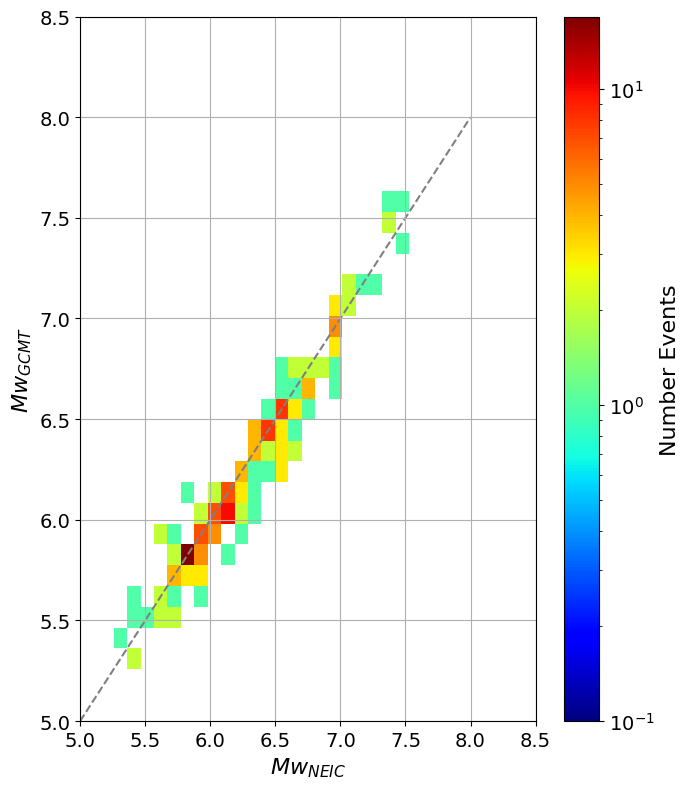

In [17]:
_ = cqt.plot_agency_magnitude_density(query_NEIC_GCMT_mw)

### Join Query Results

Join together the results of two queries. For example the Global CMT magnitudes are reported under either
'GCMT' or 'HRVD'. So search for both terms

In [23]:
query1, cat1 = cqt.get_agency_magnitude_pairs(db1, ("GCMT", "Mw"), ("NEIC", "Ms"), no_case=True)
query2, cat2 = cqt.get_agency_magnitude_pairs(db1, ("GCMT", "Mw"), ("NEIS", "Mw"), no_case=True)
query_niec_gcmt_ms = cqt.join_query_results(query1, query2)

Agency-Pairs: (GCMT, Mw) & (NEIC, Ms) returned 154 events
Agency-Pairs: (GCMT, Mw) & (NEIS, Mw) returned 25 events


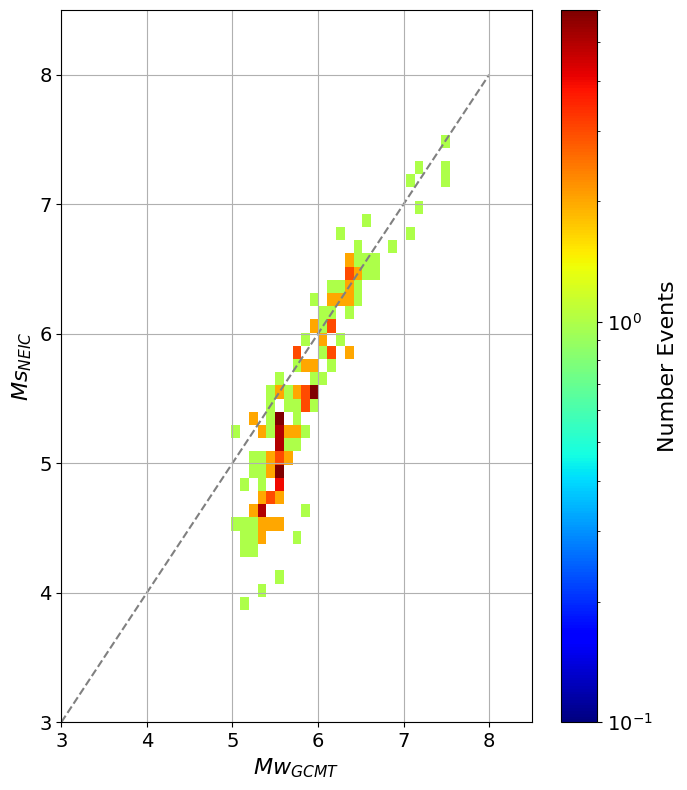

In [25]:
_ = cqt.plot_agency_magnitude_density(query_niec_gcmt_ms)

## Regression Tools

In this example we compare the $M_S$ scale as recorded by the BJI network with the $M_W$ scale reported by
HRVD/GCMT (from the previous query)

#### Set up the regression

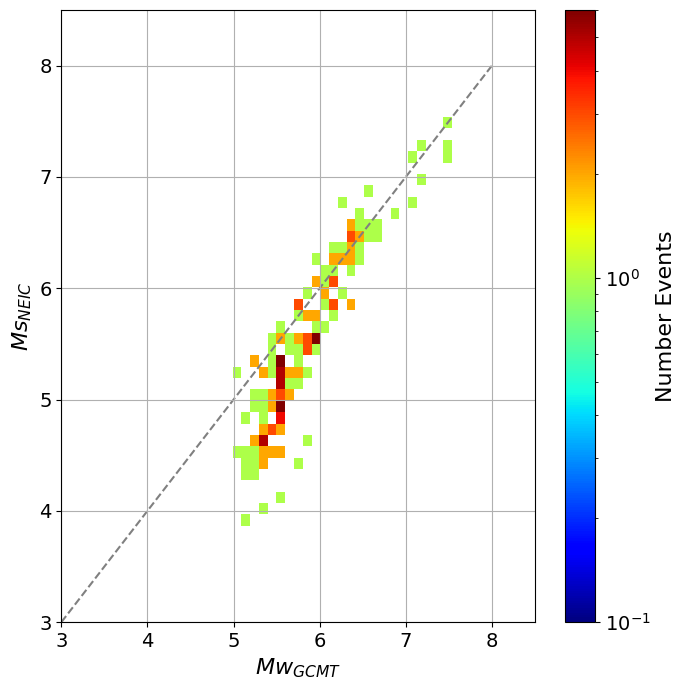

In [26]:
regressor = cqt.CatalogueRegressor(query_niec_gcmt_ms)
regressor.plot_density(overlay=False)

#### Apply a Linear Model 

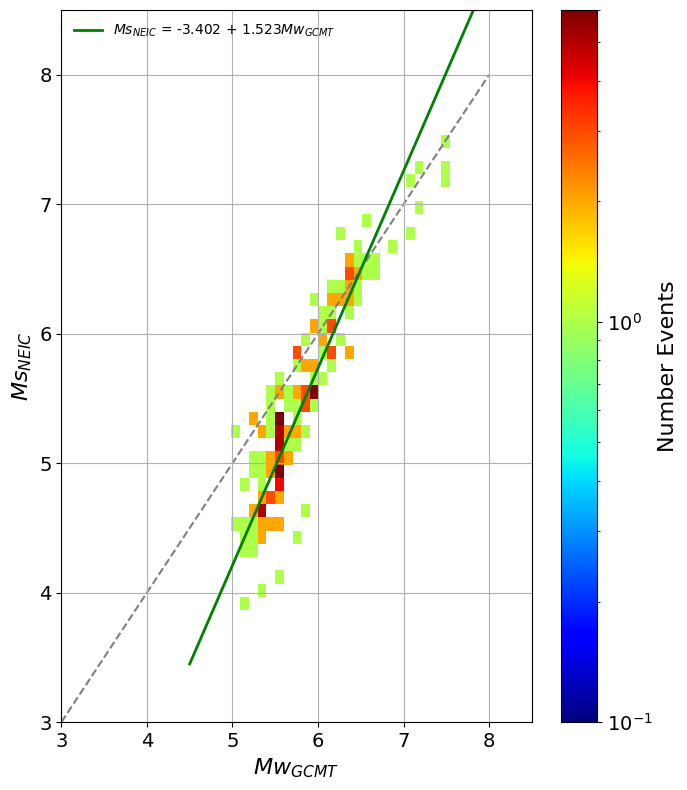

Mw = -3.402 + 1.523 MS +/- 0.324


In [27]:
linear_model = regressor.run_regression("polynomial", # Model Type
                                        [0., 1.]) # Initial guess of parameters
regressor.plot_model_density(False, 0)
# View Results
print("Mw = %.3f + %.3f MS +/- %.3f" % (regressor.results.beta[0],
                                        regressor.results.beta[1],
                                        regressor.standard_deviation))

#### Overlay another model defined as a Magnitude Conversion Rule

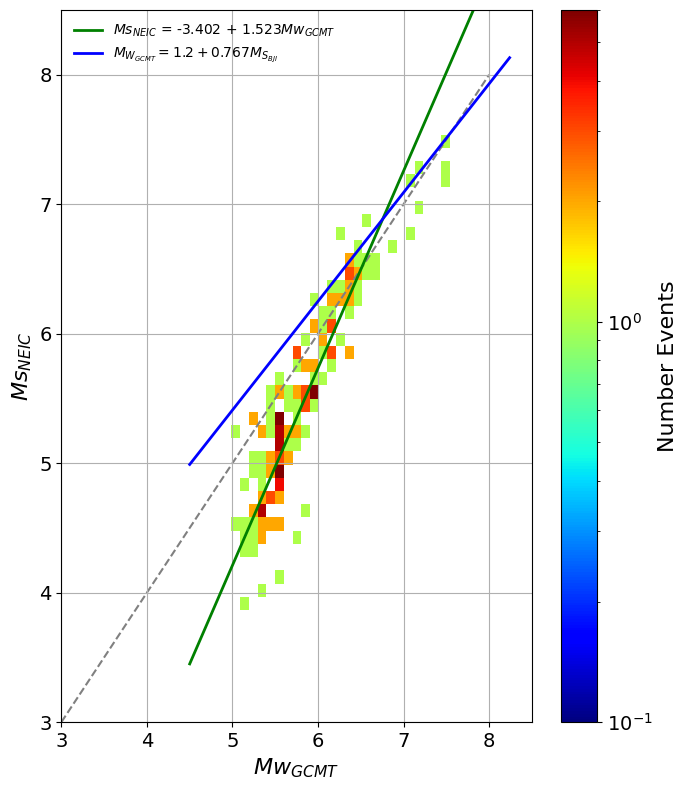

In [29]:
from openquake.cat.isc_homogenisor import MagnitudeConversionRule
# Define empirical model
def RandomRule1(magnitude):
    return 1.21 + 0.84 * magnitude

def RandomRuleSigma(magnitude):
    return 0.2
# Create Rule
rule1 = MagnitudeConversionRule("BJI", "MS", RandomRule1, RandomRuleSigma,
                                model_name=r"$M_{W_{GCMT}} = 1.2 + 0.767 M_{S_{BJI}}$")
# Plot the model - with overla set to true
regressor.plot_model_density(True, 0)
# Overlay the rule and close the figure (overlay set to False)
regressor.plot_magnitude_conversion_model(rule1, False, line_color="b")

### Apply a Piecewise Linear Model

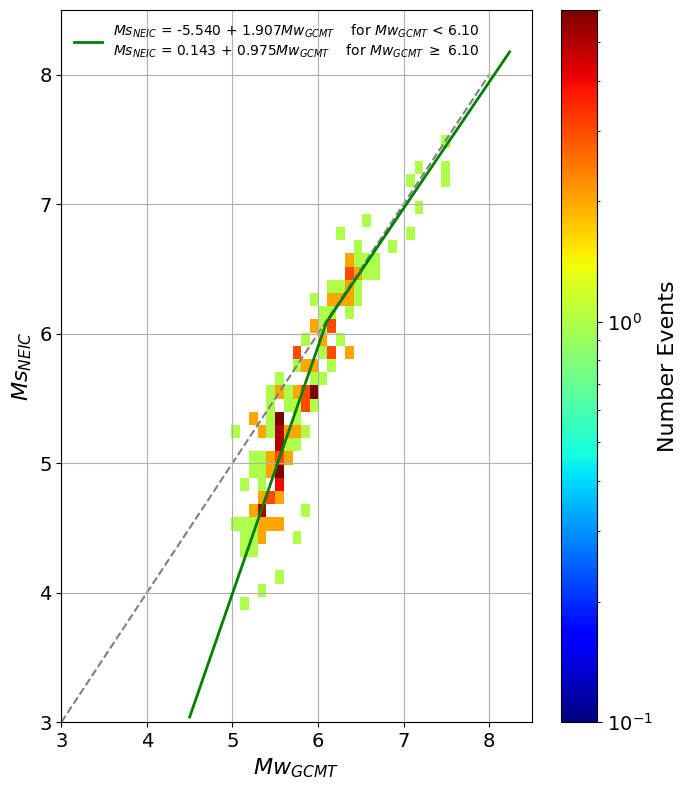

Standard Deviation - Segment 1: 0.366, Segment 2: 0.203


In [30]:
initial_guess = [1.0, 1.0, 0.0]  # [slope 1, slope 2, intercept]

linear_model = regressor.run_regression("2segmentM6.1", # Model Type
                                        initial_guess) # Initial guess of parameters
regressor.plot_model_density(False, 0)
print("Standard Deviation - Segment 1: %.3f, Segment 2: %.3f" % (regressor.standard_deviation[0],
                                                                 regressor.standard_deviation[1]))